# Notebook activity RU.04 Adding two-way interactions to the Poisson GLM

In Notebook activity RU.02, we used stepwise regression to select a Poisson GLM for the response `medals` from the Olympic dataset, considering only the main effects as potential explanatory variables. As the preferred model, the `step()` function selected the full model - that is, the Poisson GLM:

`medals ~ lagMedals + population + gdp + logPopulation + logGdp + host + nextHost + year`.

Then, in Notebook activity RU.03, we found that this model doesn't seem to satisfy the model assumptions.

In this notebook activity, we'll try adding two-way interactions into the model to see whether that improves the model fit.

The data for this dataset are stored in the data frame `olympic`. 

## (a) Getting started

As usual, we will start by loading the `M348` package into the session and `olympic`, and then checking that the data frame has loaded OK by using the `head()` function. We will also need the variables:

`logPopulation` = `log(population)` and `logGdp` = `log(gdp)`,

so we will create these at the same time and add them to `olympic`.

### (i)

To do all of this, run the code cell below.

In [ ]:
#Load the M348 package
library(M348)
#Load the data frame
data(olympic)
# Check the data frame has loaded OK
head(olympic)

# create the extra variables required
olympic$logPopulation <- log(olympic$population)
olympic$logGdp <- log(olympic$gdp)

## (b) Fitting models for the `step()` function

Once again, we'll use the `step()` function to select a model. For this function, we need both the smallest model that we'd like to consider, and the largest model that we'd like to consider. Here, we'll use the null model, with just the intercept, as our smallest model, and the model with all main effects and two-way interactions as our largest model.

Note that an easy way to fit a model including all of the two-way interactions, is to take the square of the linear predictor with the relevant main effects. So for example, to fit a model for response `y` with all main effects and two-way interactions between the explanatory variables `x1`, `x2` and `x3`, we can use the code:

`y ~ (x1 + x2 + x3)^2`.

### (i)

Run the code cell below to fit the null model (the smallest model), and the model with all main effects and all two-way interactions (the largest model) storing the results in `fitNull` and `fitTwoWay` resepctively. Running the code fits the two models, but does not produce any output.

In [2]:
# fit null model with just the intercept
fitNull <- glm(medals ~ 1, family = poisson, data = olympic)

# fit largest model with all main effects and two-way interactions
fitTwoWay <- glm(medals ~ (lagMedals + population + gdp + logPopulation 
                           + logGdp + host + nextHost + year)^2, 
                 family = poisson, data = olympic)

## (c) Using stepwise regression to select a model

We are now ready to use the `step()` function. We'll run `step()` two times:

* starting from `fitNull`, and
* starting from `fitTwoWay`.

In each case, we'll run the stepwise regression in both directions, and `fitNull` and `fitTwoWay` will be the smallest and largest models, respectively, that we'll consider.

Since we are running two versions of stepwise regression here with a lot of explanatory variables, to stop the screen output getting too out of hand, we can stop R showing the output for all the fitting steps when running `step()`, by adding the argument `trace = 0` into the `step()` function. 

We can also store the output for the selected model by assigning the output to an object using `<-` as usual. 

For example, to run the `step()` function for the null model without showing the output to the screen, but saving the output for the selected model in the object `stepNull`, we can use the command:

`stepNull <- step(fitNull, direction = "both", scope = list(lower = fitNull, upper = fitTwoWay), trace = 0)`.

We can then view the value of the AIC for the selected model by using the command:

`AIC(stepNull)`,

and a summary of the output using  the command:

`summary(stepNull)`,

and so on.

### (i)

Use the empty code cell below to run the step function two times as described above:

* starting from `fitNull`,
* starting from `fitTwoWay`.

In each case, 

* run the `step()` function in both directions, 
* use `fitNull` and `fitTwoWay` as the smallest and largest models, respectively, being considered,
* include the argument `trace = 0`, so that all of the steps of the running the stepwise regression are not shown.

Store the output for the `step()` functions as follows:

* when starting from `fitNull`, assign the output to the object `stepNull`,
* when starting from `fitTwoWay`, assign the output to the object `stepTwoWay`.

Be warned - this could take a bit of time to run! The computer will be doing a fair bit of work here!

#### Solution <a class="tocSkip">

The required code is given below. Running the code cell will carry out the stepwise regression procedures and store the output for the selected model in the associated objects, but won't produce any output to the screen.

In [3]:
# starting from `fitNull`
stepNull <- step(fitNull, direction = "both", 
                 scope = list(lower = fitNull, upper = fitTwoWay), trace = 0)

# starting from `fitTwoWay`
stepTwoWay <- step(fitTwoWay, direction = "both", 
                   scope = list(lower = fitNull, upper = fitTwoWay), trace = 0)

### (ii)

Use the empty code cell below to obtain the values of the AIC for the two selected models from running `step()`.

Explain why your output suggests that the two runs of the `step()` function didn't select the same model. 

#### Solution <a class="tocSkip">

The required code is given below, together with the resulting values of the AIC. 

From the output, we can see that the `step()` function didn't select models with the same AIC values, and so must have selected different models.

In [4]:
# AIC for stepNull
AIC(stepNull)

# AIC for stepTwoWay
AIC(stepTwoWay)

[1] 3746.147

[1] 3748.21

## (d) Which model to choose?

We've just seen that running the `step()` function when starting from the null model (`fitNull`) and when starting from the model with all main effects and two-way interactions (`fitTwoWay`) selects different models. So, how can we choose between these two models?

Well, based on the AIC values, we'd choose the model selected and stored in `stepNull`. However, these two AIC values are very close, so it's wise to also consider the wider picture before choosing one of the models over the other.

### (i)

Use the empty code cell below to obtain the summary output for the two models selected when running the `step()` function and compare which terms are included.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [5]:
# summary for selected model starting from model `fitNull`
summary(stepNull)

# summary for selected model starting from model `fitTwoWay`
summary(stepTwoWay)


Call:
glm(formula = medals ~ lagMedals + logPopulation + logGdp + population + 
    host + nextHost + year + gdp + lagMedals:logPopulation + 
    lagMedals:logGdp + logPopulation:logGdp + population:year + 
    logGdp:population + logPopulation:population + logPopulation:nextHost + 
    population:gdp + logPopulation:gdp + nextHost:gdp + lagMedals:gdp, 
    family = poisson, data = olympic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1284  -1.1877  -0.6121   0.1527   5.5288  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.471e+01  5.821e+00  -2.527  0.01152 *  
lagMedals                 1.990e-01  4.796e-03  41.496  < 2e-16 ***
logPopulation             8.845e-01  6.306e-02  14.027  < 2e-16 ***
logGdp                    8.978e-01  8.841e-02  10.155  < 2e-16 ***
population                1.993e-01  3.648e-02   5.462 4.70e-08 ***
host                      4.422e-01  6.147e-02   7.193 6.33e-13 ***



Call:
glm(formula = medals ~ lagMedals + population + gdp + logPopulation + 
    logGdp + host + nextHost + year + lagMedals:gdp + lagMedals:logPopulation + 
    lagMedals:logGdp + lagMedals:nextHost + population:gdp + 
    population:logPopulation + population:logGdp + population:host + 
    population:nextHost + population:year + gdp:logPopulation + 
    gdp:host + gdp:nextHost + logPopulation:logGdp + logPopulation:nextHost + 
    logGdp:host + logGdp:nextHost, family = poisson, data = olympic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.2176  -1.1770  -0.6046   0.1535   5.5281  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.418e+01  5.853e+00  -2.423 0.015412 *  
lagMedals                 2.018e-01  5.091e-03  39.637  < 2e-16 ***
population                1.732e-01  3.862e-02   4.485 7.31e-06 ***
gdp                      -2.611e-02  5.057e-03  -5.163 2.42e-07 ***
logPopulation             8

### (ii)

Using the output you obtained in part (i), compare which terms are included.

#### Solution <a class="tocSkip">

Most terms are included in both models, and the estimates also have the same sign (plus or minus) in both models, which is reassuring for their interpretation. In model `stepNull`, in addition the two-way interaction `logPopulation:nextHost` is included, whereas in model `stepTwoWay` the additional terms are the interactions `population:host`, `gdp:host`, and `gdp:nextHost`. It is not immediately obvious, which of these models is more plausible.

We also note that both models contain a considerable number of two-way interactions, which may mean that they are an improvement compared with the model fitted in Notebook activity RU.03, which only contained the main effects.

### (iii)

What ways of comparing the models can you think of?

#### Solution <a class="tocSkip">

First, we could check if the models satisfy the model assumptions. 

* If neither of them does, then we conclude that neither of them is good enough to be used. 
* If one of them does, and the other doesn't, then we select the model which satisfies the model assumptions. 
* If both of them do, then we could compare how well the models can predict the results of future Olympic games.

Note that the two models here are very similar, so it is unlikely that one of them will satisfy the model assumptions while the other one doesn't!

## (e) Checking the model 

### (i)

Starting with the output from part (d)(i), how do the quartiles of the deviance residuals compare? 

#### Solution <a class="tocSkip">

For both models, the quartiles of the deviance residuals are similar, with a (slightly) negative median and minimum/maximum roughly the same absolute value. The first quartile is further from zero than the third quartile. The negative median and the values of the first and third quartile indicate that the residuals are not symmetric about zero but right-skew (albeit less so than those for the model with main effects only from Notebook activity RU.03).

### (ii)

Use the empty code cell below to calculate the ratio of the residual deviance to the associated degrees of freedom for both models. 

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [6]:
# ratio for `stepNull`
2104.7/1049

# ratio for `stepTwoWay`
2094.8/1043

[1] 2.006387

[1] 2.008437

### (iii)

Based on the ratios you obtained in part (ii), are there any problems with overdispersion?

#### Solution <a class="tocSkip">

Both models have a ratio of approximately 2, and hence, by the rule of thumb given in Box 23 of Unit 7, both indicate a possible issue with overdispersion. The overdispersion problem here is, however, to a lesser extent than for the model with main effects only from Notebook activity RU.03.

### (iv)

Use the empty code cell below to produce diagnostic plots for the two Poisson GLMs.

#### Solution <a class="tocSkip">

The required code, together with the resulting diagnostic plots, are given below.

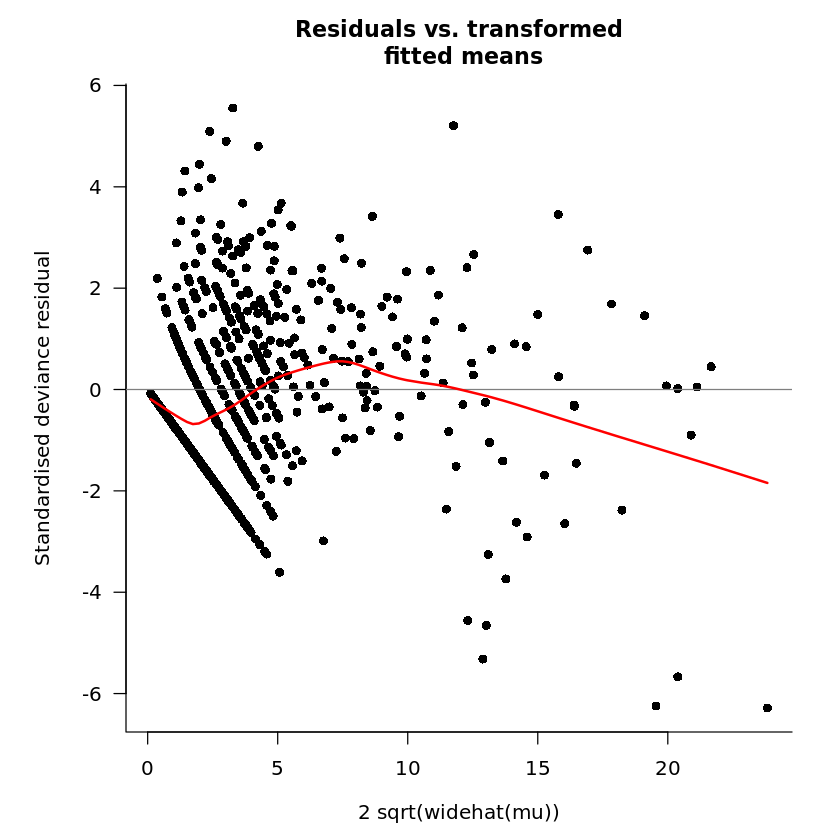

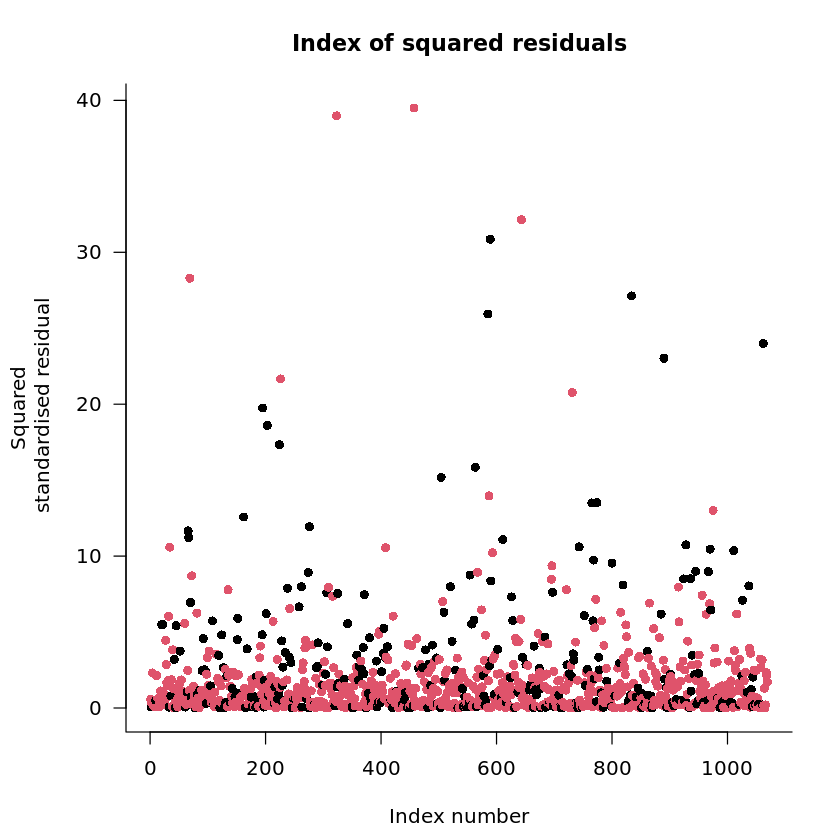

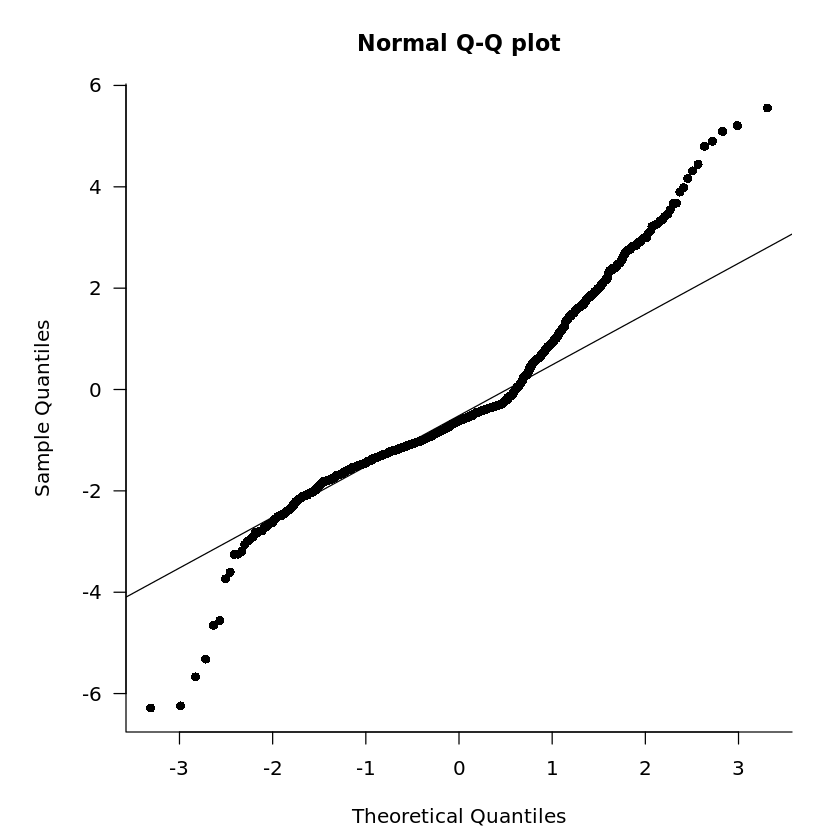

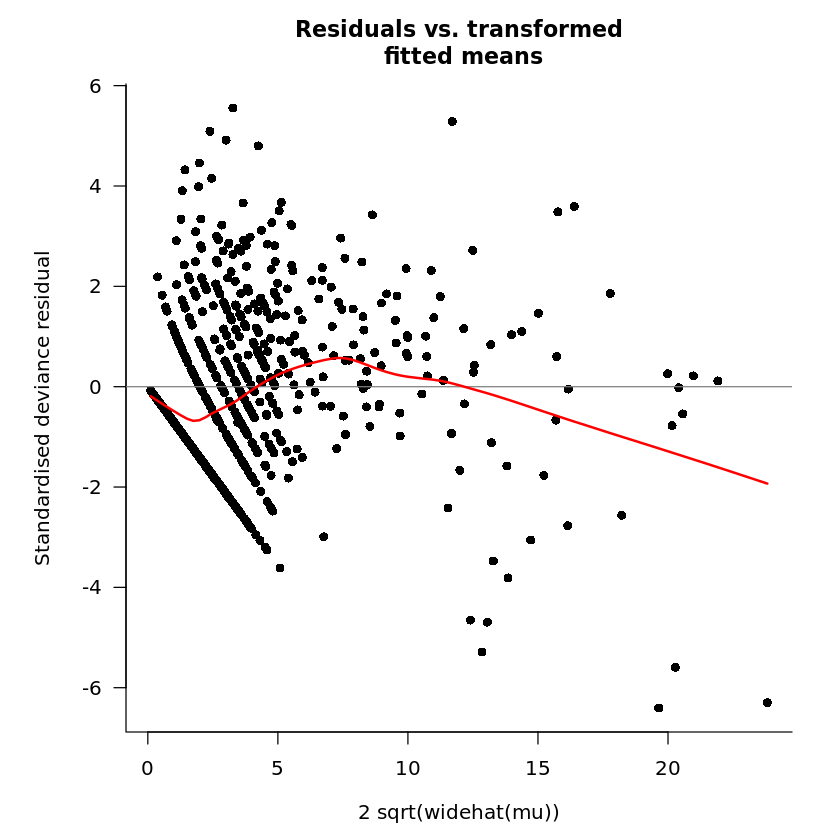

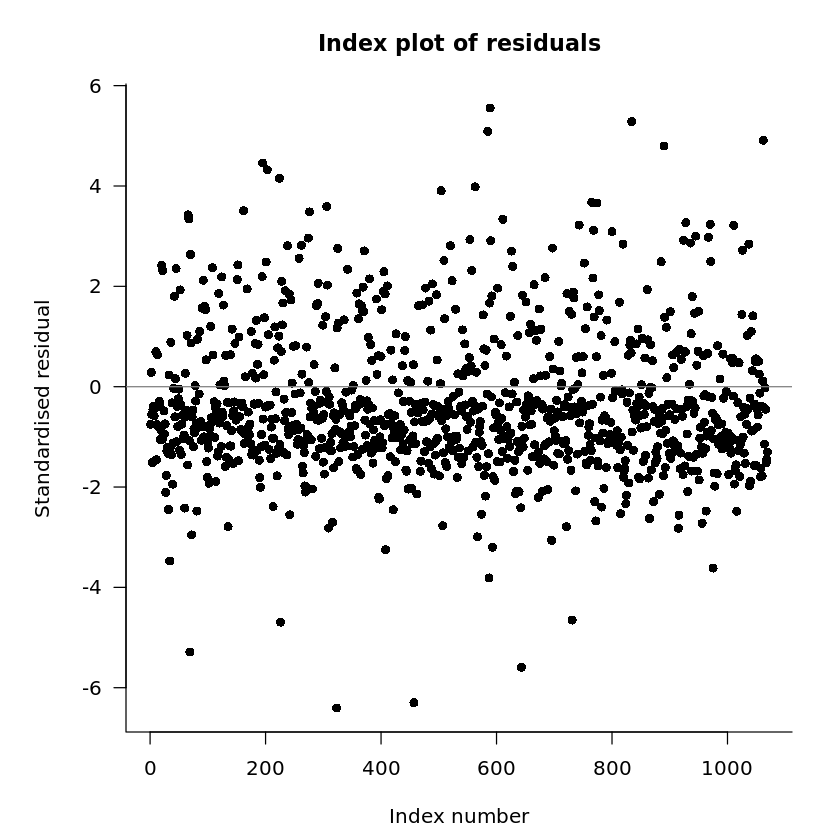

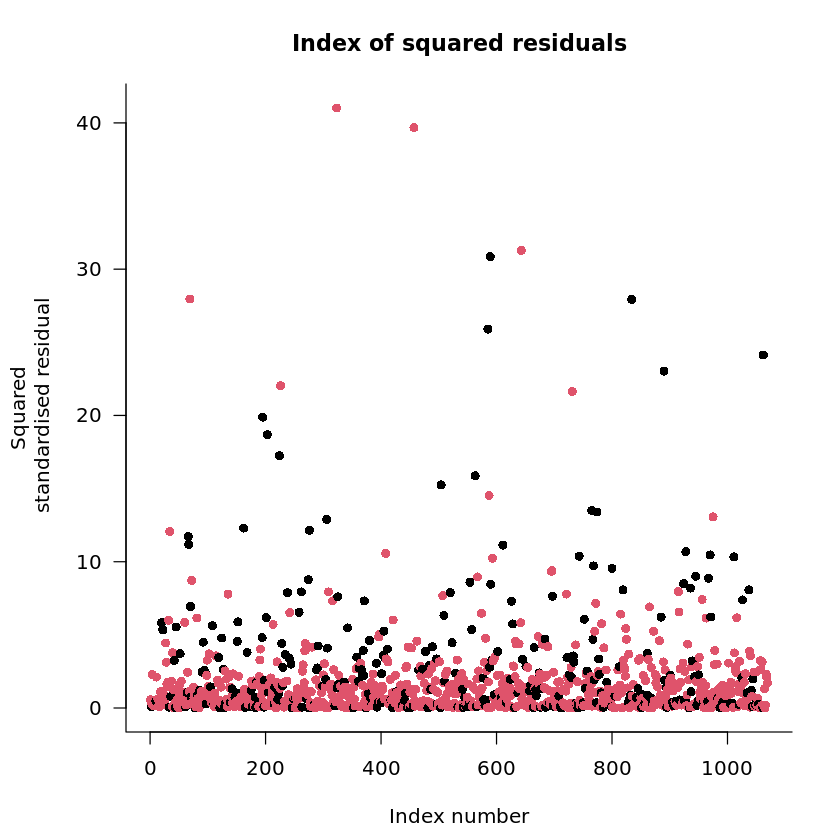

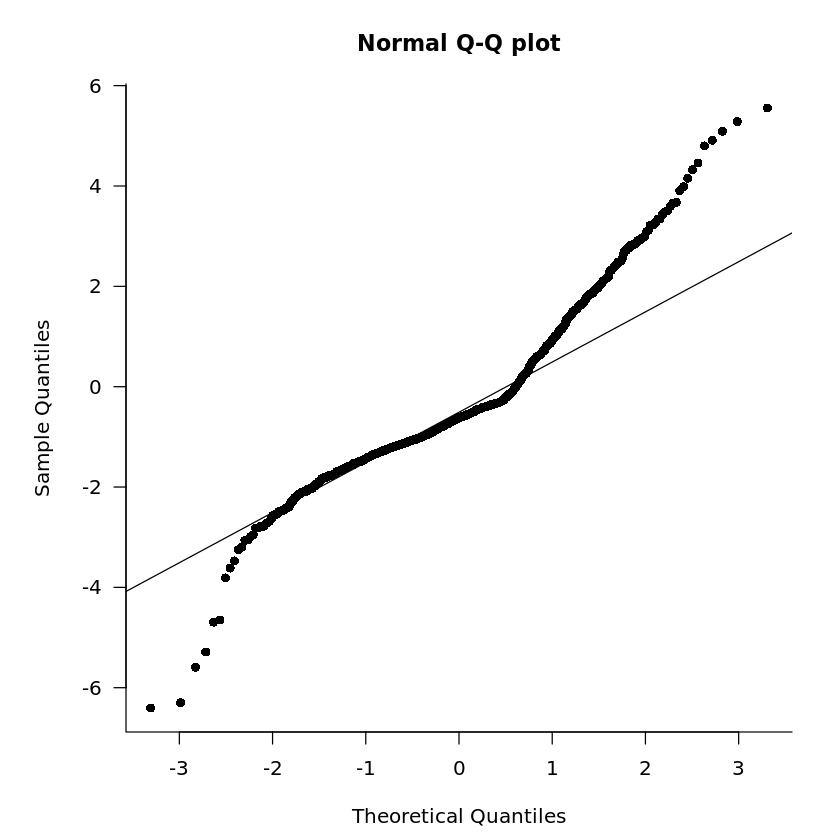

In [7]:
# diagnostic plots for `stepNull`
glmResidPlot(stepNull)

# diagnostic plots for `stepTwoWay`
glmResidPlot(stepTwoWay)

### (v)

Comment on the diagnostic plots you produced in part (iv).

#### Solution <a class="tocSkip">

The residual plots for both models are very similar (as expected). The huge outlier we saw in the model with main effects only from Notebook activity RU.03 has disappeared. But apart from that, all of the problems we identified in the model with main effects only are still present, although they have been reduced. Overall, there is still some doubt about the model assumptions, but to a lesser extent.